In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pylab as plt

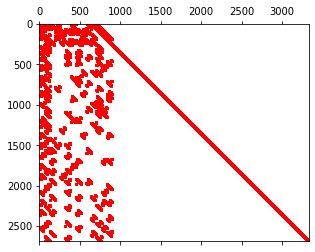

In [2]:
def get_submatrix(offset, Z):
    if offset == -1: return np.zeros((Z, Z), dtype = bool)
    offset %= Z
    if offset == 0: return np.eye(Z, dtype = bool)
    return sp.diags([np.ones(offset), np.ones(Z - offset)],
                    [offset - Z, offset], dtype = bool).toarray()

Z = 64
filler = np.vectorize(get_submatrix, otypes = [np.ndarray], signature = '()->(n,n)', excluded = (1,))
matrix = np.loadtxt('matrices/R1-1711982_BG2_set0.csv', dtype = int)
H = np.block([[x for x in row] for row in filler(matrix, Z)])


plt.spy(H, markersize = 2, color = 'r')